In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
df = pd.read_csv("scores_data.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
None
       Batch  User_ID     Score   
0  AI_ELITE_7  uid_149       6 / 7
1  AI_ELITE_7  uid_148       6 / 7
2  AI_ELITE_7  uid_147       7 / 7
3  AI_ELITE_7  uid_146       7 / 7
4  AI_ELITE_7  uid_145       4 / 7


In [20]:
df.columns = df.columns.str.strip()

print(df.columns)


Index(['Batch', 'User_ID', 'Score'], dtype='object')


In [21]:
df["Score"] = df["Score"].str.split("/").str[0].astype(int)

#

In [22]:
batch_summary = df.groupby('Batch')['Score'].agg(
    ['mean', 'median', 'min', 'max', 'std']
).reset_index()
print(batch_summary)

        Batch      mean  median  min  max       std
0  AI_ELITE_4  3.791667     4.0    0    7  1.443376
1  AI_ELITE_6  4.229167     4.0    0    7  1.640441
2  AI_ELITE_7  5.056604     5.0    2    7  1.446682


In [23]:

batch_summary["% Full Marks"] = (df.groupby("Batch")["Score"].apply(lambda x: (x == 7).mean() * 100).values)
batch_summary["% Low Performers (≤3)"] = (df.groupby("Batch")["Score"].apply(lambda x: (x <= 3).mean() * 100).values)

print(batch_summary)


        Batch      mean  median  min  max       std  % Full Marks  \
0  AI_ELITE_4  3.791667     4.0    0    7  1.443376      6.250000   
1  AI_ELITE_6  4.229167     4.0    0    7  1.640441     10.416667   
2  AI_ELITE_7  5.056604     5.0    2    7  1.446682     18.867925   

   % Low Performers (≤3)  
0              35.416667  
1              31.250000  
2              16.981132  


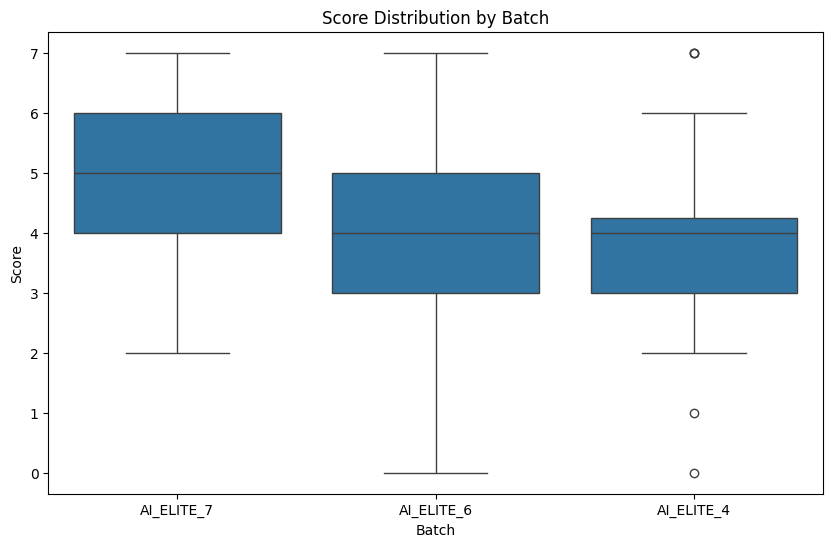

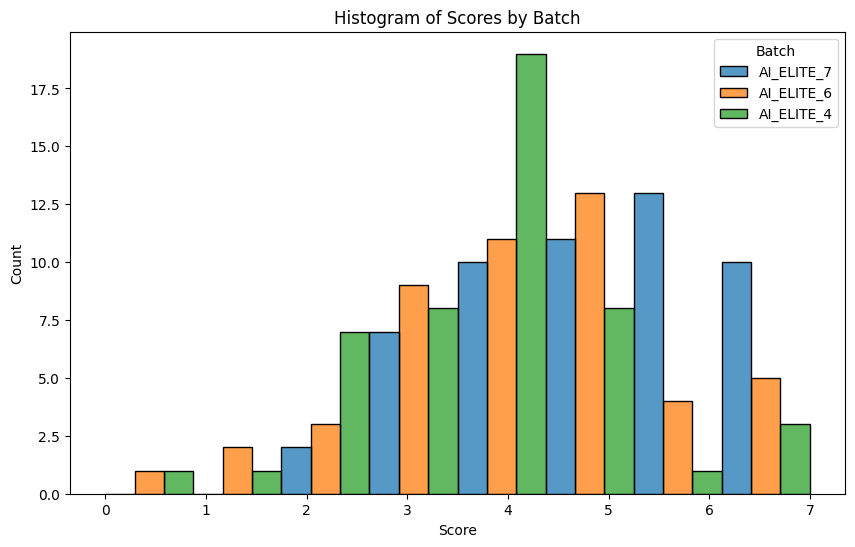

In [24]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="Batch", y="Score", data=df)
plt.title("Score Distribution by Batch")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Score", hue="Batch", multiple="dodge", bins=8)
plt.title("Histogram of Scores by Batch")
plt.show()


C:\Users\rahul\AppData\Local\Temp\ipykernel_13588\2527912576.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Batch", y="Score", data=df, estimator="mean", ci=None)


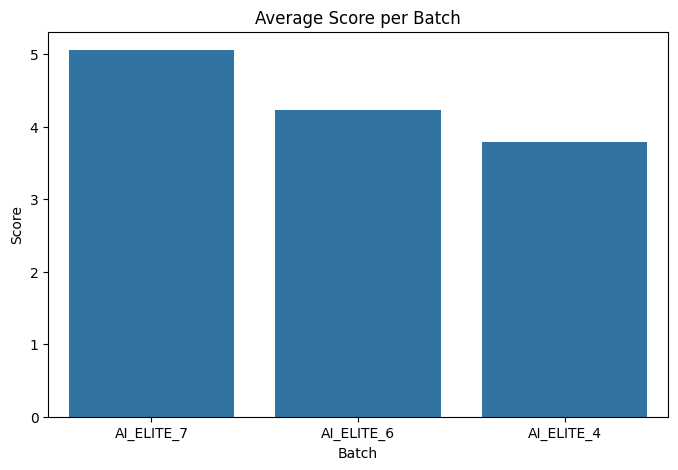

In [25]:

plt.figure(figsize=(8, 5))
sns.barplot(x="Batch", y="Score", data=df, estimator="mean", ci=None)
plt.title("Average Score per Batch")
plt.show()